<h1>Tunnuslukujen vertailua ryhmien välillä</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
# Sukupuolen ja koulutuksen tekstimuotoiset arvot
sukup = ['Mies', 'Nainen']
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']

<h2>groupby + describe()</h2>

Voit jakaa datan ryhmiin <b>groupby</b>-funktiolla ja laskea tunnusluvut tämän jälkeen.

In [4]:
# Palkan tunnuslukujen vertailu sukupuolen mukaan
df1 = df.groupby('sukup')['palkka'].describe()
df1.index = sukup
df1.style.format('{:.0f}')

,count,mean,std,min,25%,50%,75%,max
Mies,63,2664,930,1521,2086,2417,2925,6278
Nainen,19,2233,341,1715,1969,2144,2574,2729


In [5]:
# Palkan tunnuslukujen vertailu koulutuksen mukaan
df2 = df.groupby('koulutus')['palkka'].describe()
df2.index = koulutus
df2.style.format('{:.0f}')

,count,mean,std,min,25%,50%,75%,max
Peruskoulu,27,2310,473,1638,2008,2144,2534,3587
2. aste,30,2403,534,1521,2008,2378,2729,3510
Korkeakoulu,22,2887,1108,1559,2222,2710,2925,6278
Ylempi korkeakoulu,2,5147,110,5069,5108,5147,5186,5225


<h2>Boxplot</h2>

Boxplot eli ruutu- ja janakaavio on havainnollinen tapa vertailuun. Boxplot näyttää viiden luvun yhteenvedon (pienin, alaneljännes, mediaani, yläneljännes, suurin) ja erityisen poikkeavat arvot.

[Text(0, 0, 'Mies'), Text(0, 0, 'Nainen')]

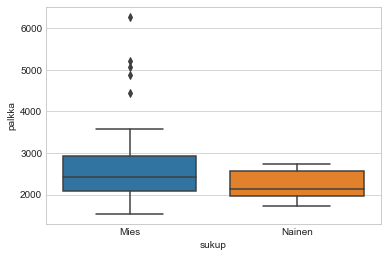

In [6]:
# Palkan vertailu sukupuolen mukaan boxplottina
ax1 = sns.boxplot(x='sukup', y='palkka', data=df)
ax1.set_xticklabels(sukup)

[Text(0, 0, 'Peruskoulu'),
 Text(0, 0, '2. aste'),
 Text(0, 0, 'Korkeakoulu'),
 Text(0, 0, 'Ylempi korkeakoulu')]

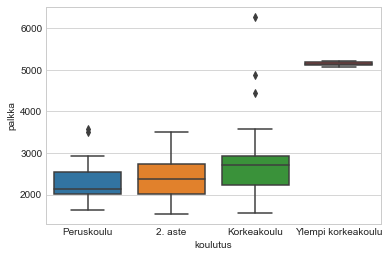

In [7]:
# Palkan vertailu koulutuksen mukaan boxplottina
ax2 = sns.boxplot(x='koulutus', y='palkka', data=df)
ax2.set_xticklabels(koulutus)

<h2>Pivot_table</h2>

Pivot-taulukkoon lasketaan oletuksena keskiarvoja.

In [8]:
# Palkkakeskiarvojen vertailua sukupuolen ja koulutuksen mukaan 
df3 = df.pivot_table(values='palkka', index='koulutus', columns='sukup', margins=True)
df3.index = koulutus + ['Kaikki']
df3.columns = sukup + ['Kaikki']
df3.style.format('{:.0f}')

,Mies,Nainen,Kaikki
Peruskoulu,2354,2121,2310
2. aste,2461,2211,2403
Korkeakoulu,3145,2334,2887
Ylempi korkeakoulu,5147,nan,5147
Kaikki,2675,2233,2571


<h2>Ovatko erot tilastollisesti merkitseviä?</h2>

Otoksessa havaitut ryhmien väliset erot voivat olla liian pieniä, jotta niitä voisi yleistää laajempaan perusjoukkoon, josta otos on otettu. Kyseessä voi olla otantavirheen (sattuman) aiheuttama ero.

Eroa sanotaan merkitseväksi, jos sen perusteella voidaan tehdä yleistys laajempaan perusjoukkoon, josta otos on otettu. Eron merkitsevyyttä voit testata laskemalla niin kutsuttu <b>p-arvo</b>. Mitä pienempi p-arvo, sitä merkitsevämpi ero. Yleensä alle 0,05 (5 %) suuruisia p-arvoja pidetään osoituksena merkitsevästä erosta.

Kahden ryhmän keskiarvojen vertailuun liittyvän p-arvon voit laskea kahden riippumattoman otoksen t-testillä (ttest).

Useamman ryhmän keskiarvojen vertailuun liittyvän p-arvon voit laskea F-testillä (f_oneway).

In [10]:
# Vertailtavien ryhmien muodostaminen
s1 = df['palkka'][df['sukup']==1] # miehet
s2 = df['palkka'][df['sukup']==2] # naiset

# Kahden riippumattoman (ind) otoksen t-testi
from scipy.stats import ttest_ind
ttest_ind(s1, s2, equal_var=False)

Ttest_indResult(statistic=3.0597612743474714, pvalue=0.003048272029697872)

Miesten (keskiarvo 2664 euroa) ja naisten (keskiarvo 2233 euroa) palkkakeskiarvojen välillä on tilastollisesti merkitsevä ero (kahden riippumattoman otoksen 2-suuntaisen t-testin p = 0,003).

In [13]:
# Vertailtavien ryhmien muodostaminen
k1 = df['palkka'][df['koulutus']==1] # peruskoulu
k2 = df['palkka'][df['koulutus']==2] # 2. aste
k3 = df['palkka'][df['koulutus']==3] # korkeakoulu
k4 = df['palkka'][df['koulutus']==4] # ylempi korkeakoulu

# F-testi
from scipy.stats import f_oneway
f_oneway(k1, k2, k3, k4)

F_onewayResult(statistic=11.675086950951924, pvalue=2.186573534680074e-06)

Eri koulutuksen suorittaneiden välillä on tilastollisesti merkitseviä eroja palkkakeskiarvoissa (F-testin p-arvo on 0,000002).

<h2>Lisätietoa merkitsevyystestauksesta</h2>

Onko ryhmien välinen ero tilastolliseti merkitsevä:
https://tilastoapu.wordpress.com/2012/04/14/onko-ryhmien-valinen-ero-tilastollisesti-merkitseva/

Lisätietoa p-arvoista:
https://tilastoapu.wordpress.com/2012/02/14/p-arvo/

p-arvoja Pythonilla eri testaustilanteisiin:
https://nbviewer.jupyter.org/github/taanila/tilastoapu/blob/master/p.ipynb